In [495]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image
import pandas_profiling


In [496]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
label_encoder = preprocessing.LabelEncoder()
from xgboost import plot_importance
from bayes_opt import BayesianOptimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [497]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

In [498]:
sample_submission = pd.read_csv('sample_submission.csv')

In [499]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_x.csv')

In [500]:
train

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,...,1,1,0,1,1,1,1,0,1,1
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,...,1,1,0,1,1,1,1,0,1,1
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,...,1,1,0,1,1,0,1,0,1,1
45530,45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,...,1,1,0,1,1,1,1,0,1,1


In [501]:
test

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,...,0,1,0,0,1,0,1,0,1,1
1,1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,...,0,0,0,0,0,0,0,0,0,0
2,2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,...,0,1,0,1,1,0,1,0,1,1
3,3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,...,1,1,1,1,1,1,1,1,1,1
4,4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,...,1,1,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,...,1,1,0,1,1,0,1,0,1,1
11379,11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,...,1,1,1,1,1,1,1,1,1,1
11380,11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,...,1,1,0,1,1,0,1,0,1,1
11381,11381,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,...,1,0,0,1,1,0,1,1,1,0


In [502]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
index,45532.0,22765.500000,13144.100565,0.0,11382.75,22765.5,34148.25,45531.0
QaA,45532.0,2.129535,1.196952,1.0,1.00,2.0,3.00,5.0
QaE,45532.0,945.357046,13075.648143,25.0,404.00,557.0,827.00,2413960.0
QbA,45532.0,2.904463,1.566142,1.0,1.00,3.0,4.00,5.0
QbE,45532.0,2189.588575,33510.265924,25.0,875.00,1218.0,1838.00,5580395.0
...,...,...,...,...,...,...,...,...
wr_09,45532.0,0.202824,0.402107,0.0,0.00,0.0,0.00,1.0
wr_10,45532.0,0.946104,0.225815,0.0,1.00,1.0,1.00,1.0
wr_11,45532.0,0.395195,0.488898,0.0,0.00,0.0,1.00,1.0
wr_12,45532.0,0.947729,0.222575,0.0,1.00,1.0,1.00,1.0


Qa : 비밀
Qb : 대부분의 범죄자와 다른 사람들의 가장 큰 차이점은 범죄자 잡힐 정도로 어리 석다는 것입니다.
Qc : 다른 사람을 완전히 신뢰하고있는 사람은 누구나 문제를 찾고 있습니다.
Qd : 비밀
Qe : P.T. Barnum은 매분마다 빠는 사람이 태어난다고 말한 것은 틀렸습니다.
Qf : 다른 사람에게 거짓말을 하는 것은 변명의 여지가 없습니다.
Qg : 비밀
Qh : 대부분의 사람들은 재산을 잃는 것보다 부모의 죽음을 더 쉽게 잊는다.
Qi : 비밀
Qj : 누구에게나 악행은 있고 기회가 있을 때 나온다고 보는 것이 가장 안전하다.
Qk : 대체로 중요하고 부정직한 것보다 겸손하고 정직한 것이 낫다.
Ql : 비밀
Qm : 여기저기서 코너를 자르지 않고는 앞서가기가 어렵습니다.
Qn : 비밀
Qo: 사람을 대하는 가장 좋은 방법은 그들이 듣고 싶은 말을 하는 것입니다.
Qp : 비밀
Qq : 대부분의 사람들은 기본적으로 착하고 친절합니다.
Qr : 도덕적으로 옳다고 확신할 때만 조치를 취해야 합니다.
Qs : 중요한 사람에게 아첨하는 것이 현명하다.
Qt : 비밀
1= 동의하지않음, 2=약간 동의하지않음, 3=보통, 4=약간 동의함, 5=동의함 

In [503]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

In [504]:
train['voted'].replace(2, 0, inplace=True)

- 0:투표 미참여자
- 1:투표 참여자

In [505]:
# 타겟 분포 확인
train["voted"].value_counts()

0    24898
1    20634
Name: voted, dtype: int64

<AxesSubplot:title={'center':'Target Rate'}, ylabel='voted'>

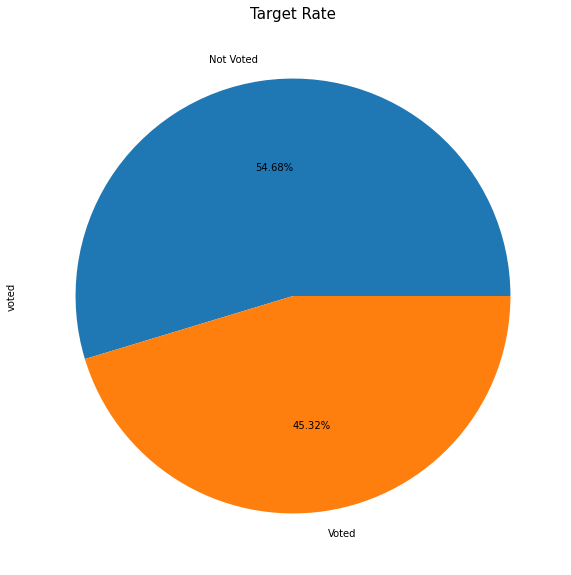

In [584]:
#타겟에 대한 비율을 파이 차트로 표현
plt.figure(figsize=(10,10))
plt.title('Target Rate', fontsize=15)
train['voted'].value_counts().plot.pie(autopct='%1.2f%%',
                                            labels=['Not Voted', 'Voted'])

<AxesSubplot:xlabel='gender', ylabel='count'>

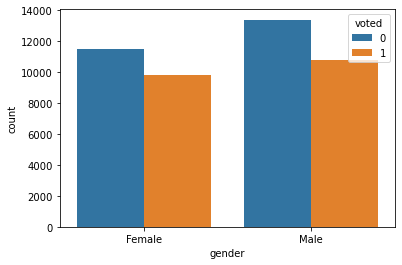

In [506]:
# 성별에 따른 타겟 분포 확인
sns.countplot(data = train, x = 'gender', hue = "voted")

<AxesSubplot:xlabel='age_group', ylabel='count'>

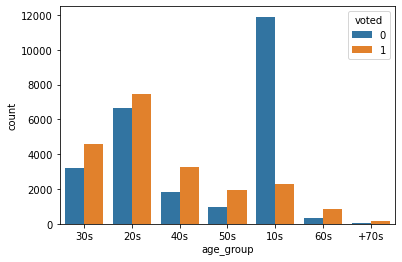

In [507]:
# 연령에 따른 타겟 분포 확인
sns.countplot(data = train, x = 'age_group', hue = "voted")

- 유독 10대들이 투표를 많이 안함

<AxesSubplot:xlabel='education', ylabel='count'>

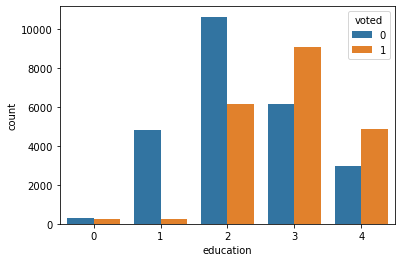

In [508]:
# 교육수준에 따른 타겟 분포 확인
sns.countplot(data = train, x = 'education', hue = "voted")

- 교육수준이 높을수록 투표를 많이 함(학사 학위 이상~)

<AxesSubplot:xlabel='urban', ylabel='count'>

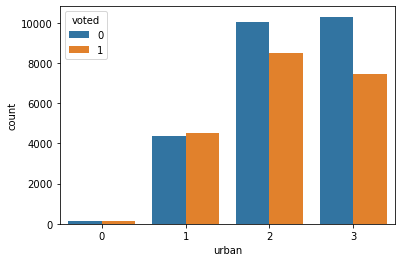

In [509]:
# 유년기 거주구역에 따른 타겟 분포 확인
sns.countplot(data = train, x = 'urban', hue = "voted")

- 유년기에 도시근처에 살았을수록 투표 안함

<AxesSubplot:xlabel='hand', ylabel='count'>

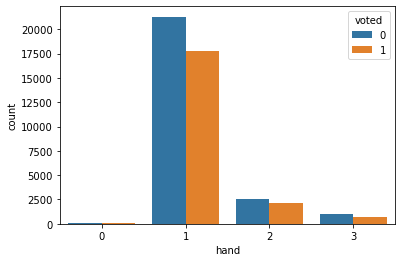

In [510]:
# 왼/오른손잡이에 따른 타겟 분포 확인
sns.countplot(data = train, x = 'hand', hue = "voted")

<AxesSubplot:xlabel='married', ylabel='count'>

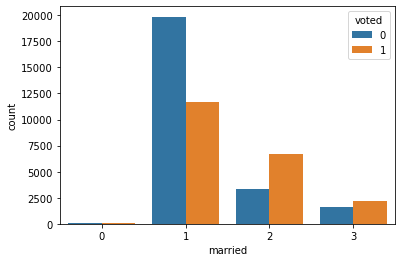

In [511]:
# 혼인상태에 따른 타겟 분포 확인(1: 미혼, 2:기혼, 3:이혼)
sns.countplot(data = train, x = 'married', hue = "voted")

- 미혼일수록 투표 안함, 결혼을 했던 사람일수록 투표를 함

<AxesSubplot:xlabel='race', ylabel='count'>

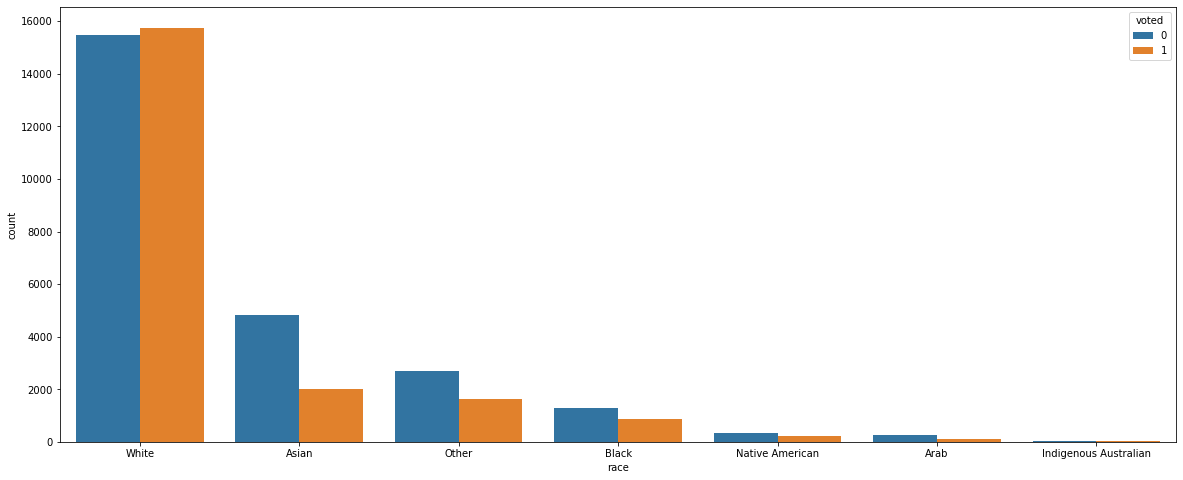

In [512]:
# 인종에 따른 타겟 분포 확인
plt.figure(figsize=(20,8))
sns.countplot(data = train, x = 'race', hue = "voted")

<AxesSubplot:xlabel='religion', ylabel='count'>

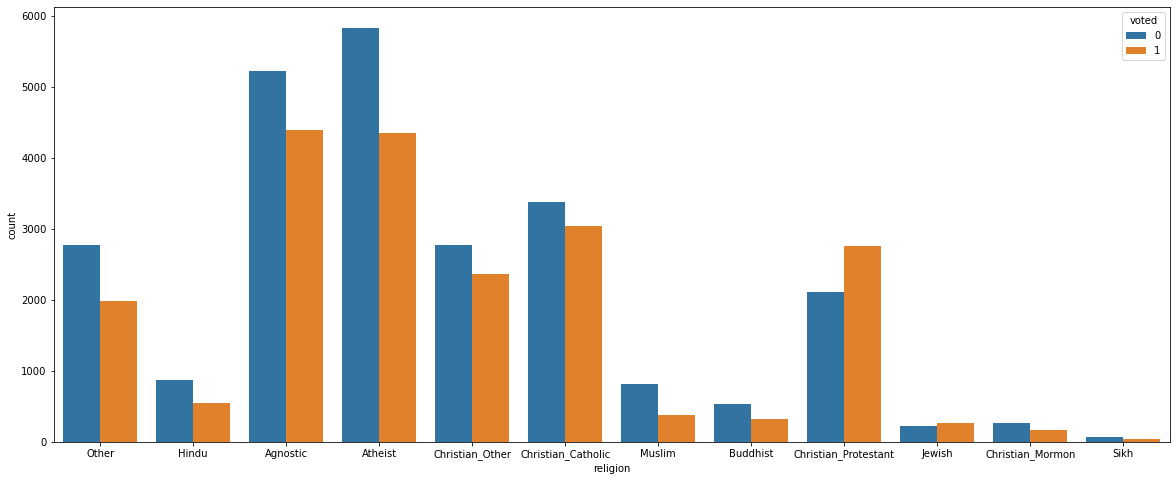

In [513]:
# 종교에 따른 타겟 분포 확인
plt.figure(figsize=(20,8))
sns.countplot(data = train, x = 'religion', hue = "voted")

<AxesSubplot:xlabel='engnat', ylabel='count'>

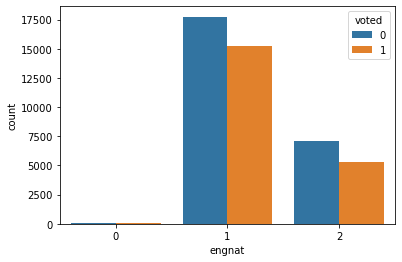

In [514]:
# 사용 언어에 따른 타겟 분포 확인
sns.countplot(data = train, x = 'engnat', hue = "voted")

In [515]:
# 가족 구성원 분포 확인
train['familysize'].value_counts()

2             17918
3             11256
1              6535
4              4907
5              1962
0              1217
6               838
7               387
8               221
9               126
10               59
11               39
12               21
13               11
14                9
15                8
44                3
17                3
21                2
16                2
20                2
999               1
100               1
34                1
18                1
2147483647        1
30                1
Name: familysize, dtype: int64

In [516]:
# 범주형으로 타입변경

train['QaA']=train['QaA'].astype(object)
train['QbA']=train['QbA'].astype(object)
train['QcA']=train['QcA'].astype(object)
train['QdA']=train['QdA'].astype(object)
train['QeA']=train['QeA'].astype(object)
train['QfA']=train['QfA'].astype(object)
train['QgA']=train['QgA'].astype(object)
train['QhA']=train['QhA'].astype(object)
train['QiA']=train['QiA'].astype(object)
train['QjA']=train['QjA'].astype(object)
train['QkA']=train['QkA'].astype(object)
train['QlA']=train['QlA'].astype(object)
train['QmA']=train['QmA'].astype(object)
train['QnA']=train['QnA'].astype(object)
train['QoA']=train['QoA'].astype(object)
train['QpA']=train['QpA'].astype(object)
train['QqA']=train['QqA'].astype(object)
train['QrA']=train['QrA'].astype(object)
train['QsA']=train['QsA'].astype(object)
train['QtA']=train['QtA'].astype(object)

train['education']=train['education'].astype(object)
train['engnat']=train['engnat'].astype(object)
train['hand']=train['hand'].astype(object)
train['married']=train['married'].astype(object)
train['urban']=train['urban'].astype(object)

train['wf_01']=train['wf_01'].astype(object)
train['wf_02']=train['wf_02'].astype(object)
train['wf_03']=train['wf_03'].astype(object)

train['wr_01']=train['wr_01'].astype(object)
train['wr_02']=train['wr_02'].astype(object)
train['wr_03']=train['wr_03'].astype(object)
train['wr_04']=train['wr_04'].astype(object)
train['wr_05']=train['wr_05'].astype(object)
train['wr_06']=train['wr_06'].astype(object)
train['wr_07']=train['wr_07'].astype(object)
train['wr_08']=train['wr_08'].astype(object)
train['wr_09']=train['wr_09'].astype(object)
train['wr_10']=train['wr_10'].astype(object)
train['wr_11']=train['wr_11'].astype(object)
train['wr_12']=train['wr_12'].astype(object)
train['wr_13']=train['wr_13'].astype(object)

In [517]:
# 범주형으로 타입변경

test['QaA']=test['QaA'].astype(object)
test['QbA']=test['QbA'].astype(object)
test['QcA']=test['QcA'].astype(object)
test['QdA']=test['QdA'].astype(object)
test['QeA']=test['QeA'].astype(object)
test['QfA']=test['QfA'].astype(object)
test['QgA']=test['QgA'].astype(object)
test['QhA']=test['QhA'].astype(object)
test['QiA']=test['QiA'].astype(object)
test['QjA']=test['QjA'].astype(object)
test['QkA']=test['QkA'].astype(object)
test['QlA']=test['QlA'].astype(object)
test['QmA']=test['QmA'].astype(object)
test['QnA']=test['QnA'].astype(object)
test['QoA']=test['QoA'].astype(object)
test['QpA']=test['QpA'].astype(object)
test['QqA']=test['QqA'].astype(object)
test['QrA']=test['QrA'].astype(object)
test['QsA']=test['QsA'].astype(object)
test['QtA']=test['QtA'].astype(object)

test['education']=test['education'].astype(object)
test['engnat']=test['engnat'].astype(object)
test['hand']=test['hand'].astype(object)
test['married']=test['married'].astype(object)
test['urban']=test['urban'].astype(object)

test['wf_01']=test['wf_01'].astype(object)
test['wf_02']=test['wf_02'].astype(object)
test['wf_03']=test['wf_03'].astype(object)

test['wr_01']=test['wr_01'].astype(object)
test['wr_02']=test['wr_02'].astype(object)
test['wr_03']=test['wr_03'].astype(object)
test['wr_04']=test['wr_04'].astype(object)
test['wr_05']=test['wr_05'].astype(object)
test['wr_06']=test['wr_06'].astype(object)
test['wr_07']=test['wr_07'].astype(object)
test['wr_08']=test['wr_08'].astype(object)
test['wr_09']=test['wr_09'].astype(object)
test['wr_10']=test['wr_10'].astype(object)
test['wr_11']=test['wr_11'].astype(object)
test['wr_12']=test['wr_12'].astype(object)
test['wr_13']=test['wr_13'].astype(object)

In [518]:
# label encoding
label = label_encoder

train['QaA']=label.fit_transform(train['QaA'])
train['QbA']=label.fit_transform(train['QbA'])
train['QcA']=label.fit_transform(train['QcA'])
train['QdA']=label.fit_transform(train['QdA'])
train['QeA']=label.fit_transform(train['QeA'])
train['QfA']=label.fit_transform(train['QfA'])
train['QgA']=label.fit_transform(train['QgA'])
train['QhA']=label.fit_transform(train['QhA'])
train['QiA']=label.fit_transform(train['QiA'])
train['QjA']=label.fit_transform(train['QjA'])
train['QkA']=label.fit_transform(train['QkA'])
train['QlA']=label.fit_transform(train['QlA'])
train['QmA']=label.fit_transform(train['QmA'])
train['QnA']=label.fit_transform(train['QnA'])
train['QoA']=label.fit_transform(train['QoA'])
train['QpA']=label.fit_transform(train['QpA'])
train['QqA']=label.fit_transform(train['QqA'])
train['QrA']=label.fit_transform(train['QrA'])
train['QsA']=label.fit_transform(train['QsA'])
train['QtA']=label.fit_transform(train['QtA'])

train['education']=label.fit_transform(train['education'])
train['engnat']=label.fit_transform(train['engnat'])
train['hand']=label.fit_transform(train['hand'])
train['married']=label.fit_transform(train['married'])
train['urban']=label.fit_transform(train['urban'])

train['wf_01']=label.fit_transform(train['wf_01'])
train['wf_02']=label.fit_transform(train['wf_02'])
train['wf_03']=label.fit_transform(train['wf_03'])

train['wr_01']=label.fit_transform(train['wr_01'])
train['wr_02']=label.fit_transform(train['wr_02'])
train['wr_03']=label.fit_transform(train['wr_03'])
train['wr_04']=label.fit_transform(train['wr_04'])
train['wr_05']=label.fit_transform(train['wr_05'])
train['wr_06']=label.fit_transform(train['wr_06'])
train['wr_07']=label.fit_transform(train['wr_07'])
train['wr_08']=label.fit_transform(train['wr_08'])
train['wr_09']=label.fit_transform(train['wr_09'])
train['wr_10']=label.fit_transform(train['wr_10'])
train['wr_11']=label.fit_transform(train['wr_11'])
train['wr_12']=label.fit_transform(train['wr_12'])
train['wr_13']=label.fit_transform(train['wr_13'])

train['gender'] = label.fit_transform(train['gender'])
train['age_group'] = label.fit_transform(train['age_group'])
train['race'] = label.fit_transform(train['race'])
train['religion'] = label.fit_transform(train['religion'])

In [519]:
# label encoding
label = label_encoder

test['QaA']=label.fit_transform(test['QaA'])
test['QbA']=label.fit_transform(test['QbA'])
test['QcA']=label.fit_transform(test['QcA'])
test['QdA']=label.fit_transform(test['QdA'])
test['QeA']=label.fit_transform(test['QeA'])
test['QfA']=label.fit_transform(test['QfA'])
test['QgA']=label.fit_transform(test['QgA'])
test['QhA']=label.fit_transform(test['QhA'])
test['QiA']=label.fit_transform(test['QiA'])
test['QjA']=label.fit_transform(test['QjA'])
test['QkA']=label.fit_transform(test['QkA'])
test['QlA']=label.fit_transform(test['QlA'])
test['QmA']=label.fit_transform(test['QmA'])
test['QnA']=label.fit_transform(test['QnA'])
test['QoA']=label.fit_transform(test['QoA'])
test['QpA']=label.fit_transform(test['QpA'])
test['QqA']=label.fit_transform(test['QqA'])
test['QrA']=label.fit_transform(test['QrA'])
test['QsA']=label.fit_transform(test['QsA'])
test['QtA']=label.fit_transform(test['QtA'])

test['education']=label.fit_transform(test['education'])
test['engnat']=label.fit_transform(test['engnat'])
test['hand']=label.fit_transform(test['hand'])
test['married']=label.fit_transform(test['married'])
test['urban']=label.fit_transform(test['urban'])

test['wf_01']=label.fit_transform(test['wf_01'])
test['wf_02']=label.fit_transform(test['wf_02'])
test['wf_03']=label.fit_transform(test['wf_03'])

test['wr_01']=label.fit_transform(test['wr_01'])
test['wr_02']=label.fit_transform(test['wr_02'])
test['wr_03']=label.fit_transform(test['wr_03'])
test['wr_04']=label.fit_transform(test['wr_04'])
test['wr_05']=label.fit_transform(test['wr_05'])
test['wr_06']=label.fit_transform(test['wr_06'])
test['wr_07']=label.fit_transform(test['wr_07'])
test['wr_08']=label.fit_transform(test['wr_08'])
test['wr_09']=label.fit_transform(test['wr_09'])
test['wr_10']=label.fit_transform(test['wr_10'])
test['wr_11']=label.fit_transform(test['wr_11'])
test['wr_12']=label.fit_transform(test['wr_12'])
test['wr_13']=label.fit_transform(test['wr_13'])

test['gender'] = label.fit_transform(test['gender'])
test['age_group'] = label.fit_transform(test['age_group'])
test['race'] = label.fit_transform(test['race'])
test['religion'] = label.fit_transform(test['religion'])

### train_2 data

- 이상치 제거
- 왜도 1 이상인 변수 제거
- 

In [520]:
# 가족 구성원 50이상 이상치라 판단 제거
outlier = train[train['familysize'] > 50].index

In [521]:
train_2 = train.drop(outlier)

In [522]:
train_2['familysize'].value_counts()

2     17918
3     11256
1      6535
4      4907
5      1962
0      1217
6       838
7       387
8       221
9       126
10       59
11       39
12       21
13       11
14        9
15        8
44        3
17        3
21        2
16        2
20        2
34        1
18        1
30        1
Name: familysize, dtype: int64

In [523]:
# 왜도 수치형 변수 추출
from scipy.stats import skew

features_index =train_2.dtypes[train.dtypes != 'object'].index
skew_features = train_2[features_index].apply(lambda x : skew(x))

skew_features_top = skew_features[skew_features>1]
print(skew_features_top.sort_values(ascending=False))

QhE           213.132316
QrE           212.354303
QlE           208.509713
QqE           161.426471
QmE           159.057331
QjE           152.124871
QaE           147.660376
QpE           145.902213
QtE           139.298516
QsE           130.382501
QbE           129.018493
QfE           125.588496
QkE           118.696461
QiE           115.159603
QdE            90.887212
QeE            85.366621
QoE            76.643866
QgE            68.224760
QnE            64.336566
QcE            56.093498
familysize      3.411673
wf_01           3.106392
hand            2.587962
wf_03           2.363764
wf_02           1.818277
wr_09           1.478174
QdA             1.451387
wr_03           1.431657
married         1.366367
tp05            1.362548
dtype: float64


In [524]:
# 변수 제거
drop_list = ['QaE','QbE','QcE','QdE','QeE','QfE','QgE','QhE','QiE','QjE','QkE','QlE','QmE','QmE','QoE','QpE','QqE','QrE','QsE','QtE']

train_2 = train_2.drop(drop_list, axis=1)

### train_3 data

- 파생변수 생성

In [525]:
train_3 = train.iloc[:]

In [526]:
# 1~7까지 선택 7로 갈수록 매우 그렇다라고 가정한 후 해석

In [527]:
# tp01~10을 이용해 긍정적인 성향변수 만들기
train_3['tp_positive'] = (train_3['tp01']+train_3['tp03']+train_3['tp05']+train_3['tp07']+train_3['tp09'])
test['tp_positive'] = (test['tp01']+test['tp03']+test['tp05']+test['tp07']+test['tp09'])

In [528]:
# tp01~10을 이용해 부정적인 성향변수 만들기
train_3['tp_negative'] = (train_3['tp02']+train_3['tp04']+train_3['tp06']+train_3['tp08']+train_3['tp10'])
test['tp_negative'] = (test['tp02']+test['tp04']+test['tp06']+test['tp08']+test['tp10'])

<AxesSubplot:xlabel='tp_positive', ylabel='count'>

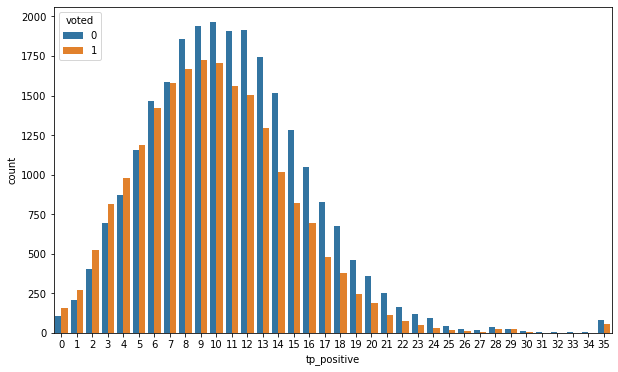

In [529]:
plt.figure(figsize=(10,6))
sns.countplot(data = train_3, x = 'tp_positive', hue = "voted")

<AxesSubplot:xlabel='voted', ylabel='tp_positive'>

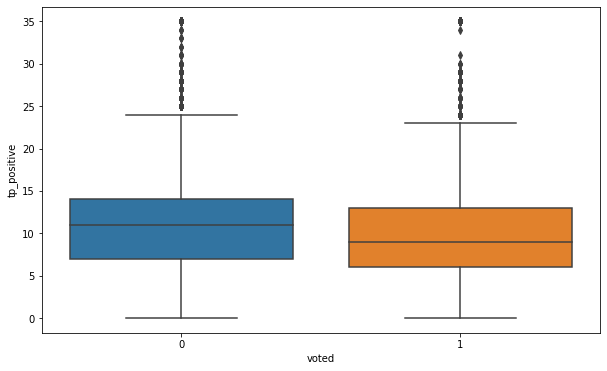

In [530]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train_3, x= 'voted', y='tp_positive')

- 긍정적인 성향이 클수록 투표를 하지 않는다

<AxesSubplot:xlabel='tp_negative', ylabel='count'>

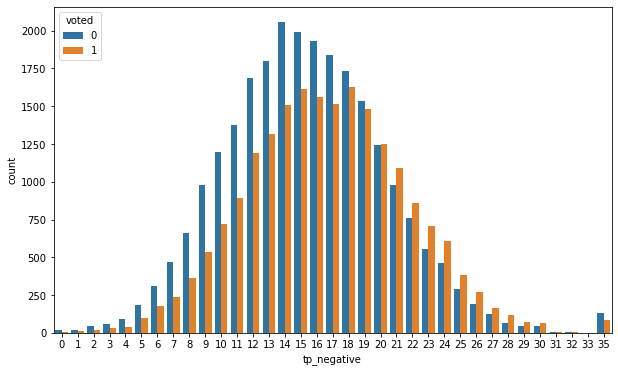

In [531]:
plt.figure(figsize=(10,6))
sns.countplot(data = train_3, x = 'tp_negative', hue = "voted")

<AxesSubplot:xlabel='voted', ylabel='tp_negative'>

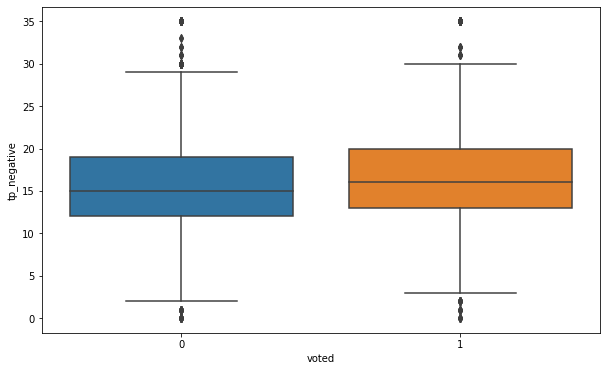

In [532]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train_3, x= 'voted', y='tp_negative')


- 부정적 성향이 높을수록 투표를 한다?

In [533]:
# wf01~03을 이용해 거짓말(허언증)하는 성향변수 만들기
train_3['wf_liar'] = (train_3['wf_01']+train_3['wf_02']+train_3['wf_03'])
test['wf_liar'] = (test['wf_01']+test['wf_02']+test['wf_03'])

<AxesSubplot:xlabel='wf_liar', ylabel='count'>

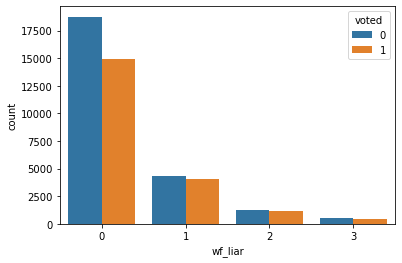

In [534]:
sns.countplot(data = train_3, x = 'wf_liar', hue = "voted")

- 거짓말을 하지 않는 사람일수록 투표를 하지 않는다

In [535]:
# wr01~13을 이용해 정직+똑똑하다는 성향변수 만들기
# 합이 클수록 정직+상식많은 사람, 작을수록 정직은 하되 상식없는 사람
train_3['wr_honest'] = (train_3['wr_01']+train_3['wr_02']+train_3['wr_03']+train_3['wr_04']+train_3['wr_05']+train_3['wr_06']+train_3['wr_07']+train_3['wr_08']+train_3['wr_09']+train_3['wr_10']+train_3['wr_11']+train_3['wr_12']+train_3['wr_13'])
test['wr_honest'] = (test['wr_01']+test['wr_02']+test['wr_03']+test['wr_04']+test['wr_05']+test['wr_06']+test['wr_07']+test['wr_08']+test['wr_09']+test['wr_10']+test['wr_11']+test['wr_12']+test['wr_13'])

<AxesSubplot:xlabel='wr_honest', ylabel='count'>

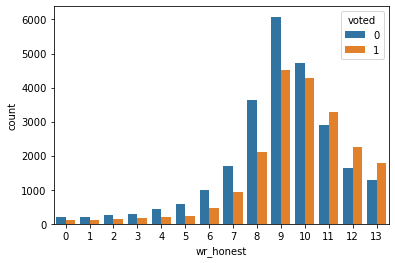

In [536]:
sns.countplot(data = train_3, x = 'wr_honest', hue = "voted")

- 11~13: 거의 모든 단어의 뜻을 안다 -> 상식 높음 -> 투표 하는 경우가 더 많음

In [537]:
# wr+wf=16인 사람은 븅신인거지...걸러야 하는 사람
train_3['wrwf'] = (train_3['wf_01']+train_3['wf_02']+train_3['wf_03']+train_3['wr_01']+train_3['wr_02']+train_3['wr_03']+train_3['wr_04']+train_3['wr_05']+train_3['wr_06']+train_3['wr_07']+train_3['wr_08']+train_3['wr_09']+train_3['wr_10']+train_3['wr_11']+train_3['wr_12']+train_3['wr_13'])
test['wrwf'] = (test['wf_01']+test['wf_02']+test['wf_03']+test['wr_01']+test['wr_02']+test['wr_03']+test['wr_04']+test['wr_05']+test['wr_06']+test['wr_07']+test['wr_08']+test['wr_09']+test['wr_10']+test['wr_11']+test['wr_12']+test['wr_13'])

In [538]:
train_3['wrwf'].value_counts()

9     9173
10    8099
11    6144
8     5166
12    4445
13    3518
7     2555
6     1446
14    1297
5      798
4      619
16     467
3      424
15     423
2      363
1      307
0      288
Name: wrwf, dtype: int64

- 걍 모든 단어 안다고 체크한 사람이 467명이나 존재... 테스트를 대충했거나(= 결과를 신뢰하지 못함), 걍 븅신이거나(허언증, 똑똑해보이고 싶은 사람?)...

### train_4 data

In [539]:
train_4 = train_3.iloc[:]

In [540]:
outlier_4 = train_4[train_4['familysize'] > 50].index

In [541]:
train_4 = train_4.drop(outlier_4)

In [542]:
# 왜도가 1 이상인 수치형 변수 추출
from scipy.stats import skew

features_index =train_4.dtypes[train_4.dtypes != 'object'].index
skew_features = train_4[features_index].apply(lambda x : skew(x))

skew_features_top = skew_features[skew_features>1]
print(skew_features_top.sort_values(ascending=False))

QhE           213.132316
QrE           212.354303
QlE           208.509713
QqE           161.426471
QmE           159.057331
QjE           152.124871
QaE           147.660376
QpE           145.902213
QtE           139.298516
QsE           130.382501
QbE           129.018493
QfE           125.588496
QkE           118.696461
QiE           115.159603
QdE            90.887212
QeE            85.366621
QoE            76.643866
QgE            68.224760
QnE            64.336566
QcE            56.093498
familysize      3.411673
wf_01           3.106392
hand            2.587962
wf_03           2.363764
wf_liar         2.043517
wf_02           1.818277
wr_09           1.478174
QdA             1.451387
wr_03           1.431657
married         1.366367
tp05            1.362548
dtype: float64


In [543]:
# 변수 제거
drop_list_4 = ['QaE','QbE','QcE','QdE','QeE','QfE','QgE','QhE','QiE','QjE','QkE','QlE','QmE','QmE','QoE','QpE','QqE','QrE','QsE','QtE']

train_4 = train_4.drop(drop_list_4, axis=1)
test = test.drop(drop_list_4, axis=1)

In [544]:
train.shape

(45532, 78)

In [545]:
train_2.shape

(45529, 59)

In [546]:
train_3.shape

(45532, 83)

In [547]:
train_4.shape

(45529, 64)

In [548]:
X_data = train.loc[:,train.columns != 'voted']
y_target = train['voted']

In [549]:
X_train, X_valid, y_train, y_valid=train_test_split(X_data, y_target,
                                                  test_size=0.2, random_state=2021)

In [550]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(36425, 77)
(36425,)
(9107, 77)
(9107,)


In [551]:
X_data_2 = train_2.loc[:,train_2.columns != 'voted']
y_target_2 = train_2['voted']

In [552]:
X_train_2, X_valid_2, y_train_2, y_valid_2=train_test_split(X_data_2, y_target_2,
                                                  test_size=0.2, random_state=2021)

In [553]:
print(X_train_2.shape)
print(y_train_2.shape)
print(X_valid_2.shape)
print(y_valid_2.shape)

(36423, 58)
(36423,)
(9106, 58)
(9106,)


In [554]:
X_data_3 = train_3.loc[:,train_3.columns != 'voted']
y_target_3 = train_3['voted']

In [555]:
X_train_3, X_valid_3, y_train_3, y_valid_3=train_test_split(X_data_3, y_target_3,
                                                  test_size=0.2, random_state=2021)

In [556]:
print(X_train_3.shape)
print(y_train_3.shape)
print(X_valid_3.shape)
print(y_valid_3.shape)

(36425, 82)
(36425,)
(9107, 82)
(9107,)


In [557]:
X_data_4 = train_4.loc[:,train_4.columns != 'voted']
y_target_4 = train_4['voted']

In [558]:
X_train_4, X_valid_4, y_train_4, y_valid_4=train_test_split(X_data_4, y_target_4,
                                                  test_size=0.2, random_state=2021)

In [559]:
print(X_train_4.shape)
print(y_train_4.shape)
print(X_valid_4.shape)
print(y_valid_4.shape)

(36423, 63)
(36423,)
(9106, 63)
(9106,)


In [ ]:
#X_data = StandardScaler().fit_transform(X_data)

In [ ]:
#X_data

## 모델링1

#### decision tree

In [266]:
dt= DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

dt_preds = dt.predict_proba(X_valid)[:, 1]

In [267]:
print(roc_auc_score(y_valid, dt_preds))

0.6038795610071114


In [272]:
cv_method = KFold(n_splits=10)
params = {
    'max_depth':[2],
    'min_samples_leaf':[2],
    'min_samples_split':[2],
    'max_leaf_nodes':[4]
}
dt_grid_cv = GridSearchCV(dt, param_grid=params, scoring='accuracy', cv=cv_method, n_jobs=-1)
dt_grid_cv.fit(X_train, y_train)

dt_preds = dt_grid_cv.predict_proba(X_valid)[:, 1]

print(dt_grid_cv.best_params_)
print(dt_grid_cv.best_score_)

{'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.6719286368823905


In [273]:
print(roc_auc_score(y_valid, dt_preds))

0.7086240285741375


#### random forest

In [274]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

rf_preds=rf.predict_proba(X_valid)[:, 1]

In [275]:
print(roc_auc_score(y_valid, rf_preds))

0.7495703697127537


In [278]:
cv_method = KFold(n_splits=5)
params={
    'n_estimators':[200],
    'max_depth' : [8],
    'min_samples_leaf' : [4],
    'min_samples_split' : [2]
 }

rf_grid_cv = GridSearchCV(rf, param_grid=params, cv=cv_method)
rf_grid_cv.fit(X_train, y_train)

rf_preds=rf_grid_cv.predict_proba(X_valid)[:, 1]

print(rf_grid_cv.best_params_)
print(rf_grid_cv.best_score_)

{'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
0.6871928620452985


In [279]:
print(roc_auc_score(y_valid, rf_preds))

0.7531350794224663


#### xgb

In [280]:
xgb=XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)
xgb_pred=xgb.predict_proba(X_valid)[:,1]

In [281]:
print(roc_auc_score(y_valid, xgb_pred))

0.760889305004504


In [290]:
cv_method = KFold(n_splits=5)

params = {
    'n_estimators' : [100],
    'learning_rate': [0.05],
    'max_depth':[6],
    'subsample': [0.8],
    'min_child_weight':[4],
    'colsample_bytree':[0.6]
}

xgb_grid_cv=GridSearchCV(xgb, param_grid=params, cv=cv_method, verbose=True, n_jobs=-1)
xgb_grid_cv.fit(X_train,y_train, eval_set=[(X_valid,y_valid)])

xgb_pred=xgb_grid_cv.predict_proba(X_valid)[:,1]

print(xgb_grid_cv.best_params_)
print(xgb_grid_cv.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[0]	validation_0-error:0.338201
[1]	validation_0-error:0.326452
[2]	validation_0-error:0.326562
[3]	validation_0-error:0.317997
[4]	validation_0-error:0.315801
[5]	validation_0-error:0.311738
[6]	validation_0-error:0.312946
[7]	validation_0-error:0.311738
[8]	validation_0-error:0.311409
[9]	validation_0-error:0.314593
[10]	validation_0-error:0.314154
[11]	validation_0-error:0.313495
[12]	validation_0-error:0.311628
[13]	validation_0-error:0.31097
[14]	validation_0-error:0.309213
[15]	validation_0-error:0.309981
[16]	validation_0-error:0.309103
[17]	validation_0-error:0.308115
[18]	validation_0-error:0.307895
[19]	validation_0-error:0.309432
[20]	validation_0-error:0.309542
[21]	validation_0-error:0.309432
[22]	validation_0-error:0.309103
[23]	validation_0-error:0.307895
[24]	validation_0-error:0.308993
[25]	validation_0-error:0.309432
[26]	validation_0-error:0.310201
[27]	validation_0-error:0.31053
[28]	validation_0-error:0.309

In [291]:
print(roc_auc_score(y_valid, xgb_pred))

0.7638190603795311


#### lgbm

In [292]:
lgbm=LGBMClassifier(random_state=0)
lgbm.fit(X_train, y_train)
lgbm_pred=lgbm.predict_proba(X_valid)[:,1]

In [293]:
print(roc_auc_score(y_valid, lgbm_pred))

0.764317683635189


In [306]:
cv_method = KFold(n_splits=5)

params = {'n_estimators':[100],
          'max_depth': [12],
          'learning_rate':[0.05],
          'num_leaves':[22],
          'min_child_samples': [6],
          'subsample': [0.8],
         'colsample_bytree':[0.7]
         }

lgbm_grid_cv = GridSearchCV(lgbm, param_grid=params, cv=cv_method, verbose=True, n_jobs=-1)
lgbm_grid_cv.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='accuracy',
         eval_set=[(X_valid, y_valid)])

lgbm_pred=lgbm_grid_cv.predict_proba(X_valid)[:,1]

print(lgbm_grid_cv.best_params_)
print(lgbm_grid_cv.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[1]	valid_0's binary_logloss: 0.681153
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.674554
[3]	valid_0's binary_logloss: 0.666245
[4]	valid_0's binary_logloss: 0.662065
[5]	valid_0's binary_logloss: 0.65839
[6]	valid_0's binary_logloss: 0.65063
[7]	valid_0's binary_logloss: 0.643636
[8]	valid_0's binary_logloss: 0.63735
[9]	valid_0's binary_logloss: 0.631576
[10]	valid_0's binary_logloss: 0.626344
[11]	valid_0's binary_logloss: 0.622917
[12]	valid_0's binary_logloss: 0.619253
[13]	valid_0's binary_logloss: 0.615008
[14]	valid_0's binary_logloss: 0.611763
[15]	valid_0's binary_logloss: 0.607902
[16]	valid_0's binary_logloss: 0.604568
[17]	valid_0's binary_logloss: 0.601444
[18]	valid_0's binary_logloss: 0.598863
[19]	valid_0's binary_logloss: 0.596707
[20]	valid_0's binary_logloss: 0.594402
[21]	valid_0's binary_logloss: 0.592507
[22]	valid_0's binary_logloss: 0.590296
[23]	valid_

In [307]:
print(roc_auc_score(y_valid, lgbm_pred))

0.7661198724474547


#### 로지스틱 회귀

In [322]:
#lr = LogisticRegression(C = 0.9, solver='lbfgs', max_iter=10000)
#lr.fit(X_train, y_train)
#lr_preds = lr.predict_proba(X_valid)[:,1]

In [323]:
#print(roc_auc_score(y_valid,lr_preds))

In [324]:
#cv_method = KFold(n_splits=5)
#params = {
#    'C': [0.4,0.43,0.45]
#}
#lr_grid_cv = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=cv_method, n_jobs=-1)
#lr_grid_cv.fit(X_train, y_train)

#lr_grid_cv_preds = lr_grid_cv.predict_proba(X_valid)[:,1]

#print(lr_grid_cv.best_params_)
#print(lr_grid_cv.best_score_)

In [325]:
#print(roc_auc_score(y_valid,lr_preds))

#### catboost

In [308]:
cat = CatBoostClassifier(learning_rate=0.005, iterations=5000)
cat.fit(X_train, y_train, early_stopping_rounds=100,verbose=500)
cat_preds = cat.predict_proba(X_valid)[:,1]

0:	learn: 0.6918848	total: 178ms	remaining: 14m 51s
500:	learn: 0.5608740	total: 14.3s	remaining: 2m 8s
1000:	learn: 0.5505095	total: 27.6s	remaining: 1m 50s
1500:	learn: 0.5433973	total: 40.5s	remaining: 1m 34s
2000:	learn: 0.5368496	total: 54.4s	remaining: 1m 21s
2500:	learn: 0.5293999	total: 1m 7s	remaining: 1m 7s
3000:	learn: 0.5217363	total: 1m 21s	remaining: 54.1s
3500:	learn: 0.5143404	total: 1m 33s	remaining: 40.2s
4000:	learn: 0.5073502	total: 1m 46s	remaining: 26.7s
4500:	learn: 0.5006668	total: 1m 59s	remaining: 13.2s
4999:	learn: 0.4940618	total: 2m 11s	remaining: 0us


In [309]:
print(roc_auc_score(y_valid, cat_preds))

0.7663964283885598


In [312]:
cat = CatBoostClassifier(learning_rate=0.005, iterations=5000)
cat.fit(X_train, y_train, early_stopping_rounds=100,verbose=100)
cat_preds = cat.predict_proba(X_valid)[:,1]

0:	learn: 0.6918848	total: 21.5ms	remaining: 1m 47s
100:	learn: 0.6088150	total: 1.99s	remaining: 1m 36s
200:	learn: 0.5816635	total: 4.09s	remaining: 1m 37s
300:	learn: 0.5705376	total: 6.23s	remaining: 1m 37s
400:	learn: 0.5647040	total: 8.4s	remaining: 1m 36s
500:	learn: 0.5608740	total: 10.5s	remaining: 1m 34s
600:	learn: 0.5581117	total: 12.9s	remaining: 1m 34s
700:	learn: 0.5558639	total: 15s	remaining: 1m 32s
800:	learn: 0.5538854	total: 17.3s	remaining: 1m 30s
900:	learn: 0.5521023	total: 19.5s	remaining: 1m 28s
1000:	learn: 0.5505095	total: 21.7s	remaining: 1m 26s
1100:	learn: 0.5489753	total: 23.8s	remaining: 1m 24s
1200:	learn: 0.5475315	total: 26s	remaining: 1m 22s
1300:	learn: 0.5461047	total: 28.4s	remaining: 1m 20s
1400:	learn: 0.5447633	total: 30.6s	remaining: 1m 18s
1500:	learn: 0.5433973	total: 33s	remaining: 1m 16s
1600:	learn: 0.5421356	total: 35.3s	remaining: 1m 14s
1700:	learn: 0.5408320	total: 37.7s	remaining: 1m 13s
1800:	learn: 0.5395171	total: 40.1s	remaining:

In [313]:
print(roc_auc_score(y_valid, cat_preds))

0.7663964283885598


In [102]:
cat.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'iterations': 5000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'od_pval': 0,
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'od_wait': 100,
 'class_names': [1, 2],
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'Logloss',
 'learning_rate': 0.05000000074505806

### 기본 데이터로 모델링 시
### - decision tree -> 0.7086
### - random forest -> 0.7531
### - xgboost -> 0.7638
### - lightgbm -> 0.7661
### - catboost -> 0.7664

## 모델링2

#### decision tree

In [296]:
dt= DecisionTreeClassifier(random_state=0)
dt.fit(X_train_2, y_train_2)

dt_preds = dt.predict_proba(X_valid_2)[:, 1]

In [297]:
print(roc_auc_score(y_valid_2, dt_preds))

0.6131602430030264


In [326]:
cv_method = KFold(n_splits=10)
params = {
    'max_depth':[2],
    'min_samples_leaf':[2],
    'min_samples_split':[2],
    'max_leaf_nodes':[4]
}
dt_grid_cv = GridSearchCV(dt, param_grid=params, scoring='accuracy', cv=cv_method, n_jobs=-1)
dt_grid_cv.fit(X_train_2, y_train_2)

dt_preds = dt_grid_cv.predict_proba(X_valid_2)[:, 1]

print(dt_grid_cv.best_params_)
print(dt_grid_cv.best_score_)

{'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.6707022170809551


In [327]:
print(roc_auc_score(y_valid_2, dt_preds))

0.7139478570589649


#### random forest

In [316]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train_2, y_train_2)

rf_preds=rf.predict_proba(X_valid_2)[:, 1]

In [317]:
print(roc_auc_score(y_valid_2, rf_preds))

0.759353928673377


In [344]:
cv_method = KFold(n_splits=5)
params={
    'n_estimators':[200],
    'max_depth' : [14],
    'min_samples_leaf' : [2],
    'min_samples_split' : [2]
 }

rf_grid_cv = GridSearchCV(rf, param_grid=params, cv=cv_method)
rf_grid_cv.fit(X_train_2, y_train_2)

rf_preds=rf_grid_cv.predict_proba(X_valid_2)[:, 1]

print(rf_grid_cv.best_params_)
print(rf_grid_cv.best_score_)

{'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
0.6933256972625855


In [345]:
print(roc_auc_score(y_valid_2, rf_preds))

0.7660819262123901


#### xgboost

In [330]:
xgb=XGBClassifier(random_state=0)
xgb.fit(X_train_2, y_train_2)
xgb_pred=xgb.predict_proba(X_valid_2)[:,1]

In [331]:
print(roc_auc_score(y_valid_2, xgb_pred))

0.7681721658397263


In [338]:
cv_method = KFold(n_splits=5)

params = {
    'n_estimators' : [100],
    'learning_rate': [0.05],
    'max_depth':[6],
    'subsample': [0.8],
    'min_child_weight':[2],
    'colsample_bytree':[0.6]
}

xgb_grid_cv=GridSearchCV(xgb, param_grid=params, cv=cv_method, verbose=True, n_jobs=-1)
xgb_grid_cv.fit(X_train_2,y_train_2, eval_set=[(X_valid_2,y_valid_2)])

xgb_pred=xgb_grid_cv.predict_proba(X_valid_2)[:,1]

print(xgb_grid_cv.best_params_)
print(xgb_grid_cv.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[0]	validation_0-error:0.331649
[1]	validation_0-error:0.336591
[2]	validation_0-error:0.323084
[3]	validation_0-error:0.322095
[4]	validation_0-error:0.318362
[5]	validation_0-error:0.315616
[6]	validation_0-error:0.312541
[7]	validation_0-error:0.315177
[8]	validation_0-error:0.310345
[9]	validation_0-error:0.310674
[10]	validation_0-error:0.310235
[11]	validation_0-error:0.308368
[12]	validation_0-error:0.308148
[13]	validation_0-error:0.304524
[14]	validation_0-error:0.305842
[15]	validation_0-error:0.306501
[16]	validation_0-error:0.306391
[17]	validation_0-error:0.305513
[18]	validation_0-error:0.304854
[19]	validation_0-error:0.304744
[20]	validation_0-error:0.304634
[21]	validation_0-error:0.304854
[22]	validation_0-error:0.303207
[23]	validation_0-error:0.302108
[24]	validation_0-error:0.302658
[25]	validation_0-error:0.302328
[26]	validation_0-error:0.302987
[27]	validation_0-error:0.301999
[28]	validation_0-error:0.

In [339]:
print(roc_auc_score(y_valid_2, xgb_pred))

0.7719045299973633


#### lgbm

In [342]:
lgbm=LGBMClassifier(random_state=0)
lgbm.fit(X_train_2, y_train_2)
lgbm_pred=lgbm.predict_proba(X_valid_2)[:,1]

In [343]:
print(roc_auc_score(y_valid_2, lgbm_pred))

0.7715978545699768


In [350]:
cv_method = KFold(n_splits=5)

params = {'n_estimators':[200],
          'max_depth': [16],
          'learning_rate':[0.05],
          'num_leaves':[20],
          'min_child_samples': [6],
          'subsample': [0.8],
         'colsample_bytree':[0.7]
         }

lgbm_grid_cv = GridSearchCV(lgbm, param_grid=params, cv=cv_method, verbose=True, n_jobs=-1)
lgbm_grid_cv.fit(X_train_2, y_train_2, early_stopping_rounds=100, eval_metric='accuracy',
         eval_set=[(X_valid_2, y_valid_2)])

lgbm_pred=lgbm_grid_cv.predict_proba(X_valid_2)[:,1]

print(lgbm_grid_cv.best_params_)
print(lgbm_grid_cv.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[1]	valid_0's binary_logloss: 0.679041
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.670989
[3]	valid_0's binary_logloss: 0.662303
[4]	valid_0's binary_logloss: 0.655577
[5]	valid_0's binary_logloss: 0.648168
[6]	valid_0's binary_logloss: 0.642246
[7]	valid_0's binary_logloss: 0.635997
[8]	valid_0's binary_logloss: 0.630235
[9]	valid_0's binary_logloss: 0.625728
[10]	valid_0's binary_logloss: 0.621526
[11]	valid_0's binary_logloss: 0.617678
[12]	valid_0's binary_logloss: 0.616369
[13]	valid_0's binary_logloss: 0.612207
[14]	valid_0's binary_logloss: 0.608358
[15]	valid_0's binary_logloss: 0.606922
[16]	valid_0's binary_logloss: 0.60368
[17]	valid_0's binary_logloss: 0.600481
[18]	valid_0's binary_logloss: 0.597552
[19]	valid_0's binary_logloss: 0.596397
[20]	valid_0's binary_logloss: 0.593832
[21]	valid_0's binary_logloss: 0.591519
[22]	valid_0's binary_logloss: 0.589137
[23]	val

In [351]:
print(roc_auc_score(y_valid_2, lgbm_pred))

0.7720041138307627


#### catboost

In [352]:
cat = CatBoostClassifier(learning_rate=0.005, iterations=5000)
cat.fit(X_train_2, y_train_2, early_stopping_rounds=100,verbose=500)
cat_preds = cat.predict_proba(X_valid_2)[:,1]

0:	learn: 0.6915242	total: 43ms	remaining: 3m 34s
500:	learn: 0.5614007	total: 9.56s	remaining: 1m 25s
1000:	learn: 0.5513929	total: 18.8s	remaining: 1m 15s
1500:	learn: 0.5447487	total: 28.4s	remaining: 1m 6s
2000:	learn: 0.5387465	total: 38.5s	remaining: 57.7s
2500:	learn: 0.5318119	total: 50.6s	remaining: 50.6s
3000:	learn: 0.5250016	total: 1m 2s	remaining: 41.7s
3500:	learn: 0.5185283	total: 1m 16s	remaining: 32.7s
4000:	learn: 0.5124788	total: 1m 28s	remaining: 22s
4500:	learn: 0.5064504	total: 1m 40s	remaining: 11.1s
4999:	learn: 0.5008683	total: 1m 51s	remaining: 0us


In [353]:
print(roc_auc_score(y_valid_2, cat_preds))

0.7741523731335506


### 이상치 제거, 변수 제거 데이터로 모델링 시
### decision tree -> 0.7139
### random forest -> 0.7660
### xgboost -> 0.7719
### lightgbm -> 0.7720
### catboost -> 0.7742

- 가장 성능이 높았던 catboost 모델로 test data 넣어서 예측 후 제출

In [574]:
pred_y = cat.predict_proba(test)[:,1]

In [575]:
pred_y

array([0.24546182, 0.07354219, 0.56035983, ..., 0.81348139, 0.64805957,
       0.42665561])

In [576]:
pred = np.where(pred_y > 0.5, 1, 2)

In [577]:
pred

array([2, 2, 1, ..., 1, 1, 2])

In [579]:
sample_submission['voted'] = pred
sample_submission.to_csv('sample_submission.csv', index=False)

## 모델링3

#### decision tree

In [354]:
dt= DecisionTreeClassifier(random_state=0)
dt.fit(X_train_3, y_train_3)

dt_preds = dt.predict_proba(X_valid_3)[:, 1]

In [355]:
print(roc_auc_score(y_valid_3, dt_preds))

0.6093669964506221


In [358]:
cv_method = KFold(n_splits=10)
params = {
    'max_depth':[2],
    'min_samples_leaf':[2],
    'min_samples_split':[2],
    'max_leaf_nodes':[4]
}
dt_grid_cv = GridSearchCV(dt, param_grid=params, scoring='accuracy', cv=cv_method, n_jobs=-1)
dt_grid_cv.fit(X_train_3, y_train_3)

dt_preds = dt_grid_cv.predict_proba(X_valid_3)[:, 1]

print(dt_grid_cv.best_params_)
print(dt_grid_cv.best_score_)

{'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.6719286368823905


In [359]:
print(roc_auc_score(y_valid_3, dt_preds))

0.7086240285741375


#### random forest

In [360]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train_3, y_train_3)

rf_preds=rf.predict_proba(X_valid_3)[:, 1]

In [361]:
print(roc_auc_score(y_valid_3, rf_preds))

0.7481386013492347


In [369]:
cv_method = KFold(n_splits=5)
params={
    'n_estimators':[200],
    'max_depth' : [16],
    'min_samples_leaf' : [8],
    'min_samples_split' : [2]
 }

rf_grid_cv = GridSearchCV(rf, param_grid=params, cv=cv_method)
rf_grid_cv.fit(X_train_3, y_train_3)

rf_preds=rf_grid_cv.predict_proba(X_valid_3)[:, 1]

print(rf_grid_cv.best_params_)
print(rf_grid_cv.best_score_)

{'max_depth': 16, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 200}
0.6904598490048043


In [370]:
print(roc_auc_score(y_valid_3, rf_preds))

0.7590914966981694


#### xgboost

In [367]:
xgb=XGBClassifier(random_state=0)
xgb.fit(X_train_3, y_train_3)
xgb_pred=xgb.predict_proba(X_valid_3)[:,1]

In [368]:
print(roc_auc_score(y_valid_3, xgb_pred))

0.7612380906211811


In [383]:
cv_method = KFold(n_splits=5)

params = {
    'n_estimators' : [100],
    'learning_rate': [0.05],
    'max_depth':[6],
    'subsample': [0.8],
    'min_child_weight':[2],
    'colsample_bytree':[0.6]
}

xgb_grid_cv=GridSearchCV(xgb, param_grid=params, cv=cv_method, verbose=True, n_jobs=-1)
xgb_grid_cv.fit(X_train_3,y_train_3, eval_set=[(X_valid_3,y_valid_3)])

xgb_pred=xgb_grid_cv.predict_proba(X_valid_3)[:,1]

print(xgb_grid_cv.best_params_)
print(xgb_grid_cv.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[0]	validation_0-error:0.337103
[1]	validation_0-error:0.318876
[2]	validation_0-error:0.323268
[3]	validation_0-error:0.319644
[4]	validation_0-error:0.312287
[5]	validation_0-error:0.31053
[6]	validation_0-error:0.309981
[7]	validation_0-error:0.308993
[8]	validation_0-error:0.31064
[9]	validation_0-error:0.311079
[10]	validation_0-error:0.309103
[11]	validation_0-error:0.309323
[12]	validation_0-error:0.307566
[13]	validation_0-error:0.308005
[14]	validation_0-error:0.308554
[15]	validation_0-error:0.309652
[16]	validation_0-error:0.310091
[17]	validation_0-error:0.309323
[18]	validation_0-error:0.309542
[19]	validation_0-error:0.308773
[20]	validation_0-error:0.308334
[21]	validation_0-error:0.308444
[22]	validation_0-error:0.309103
[23]	validation_0-error:0.309432
[24]	validation_0-error:0.310201
[25]	validation_0-error:0.309432
[26]	validation_0-error:0.307675
[27]	validation_0-error:0.305699
[28]	validation_0-error:0.307

In [384]:
print(roc_auc_score(y_valid_3, xgb_pred))

0.7651437010368951


#### lgbm

In [373]:
lgbm=LGBMClassifier(random_state=0)
lgbm.fit(X_train_3, y_train_3)
lgbm_pred=lgbm.predict_proba(X_valid_3)[:,1]

In [374]:
print(roc_auc_score(y_valid_3, lgbm_pred))

0.7645202576983496


In [385]:
cv_method = KFold(n_splits=5)

params = {'n_estimators':[150],
          'max_depth': [16],
          'learning_rate':[0.05],
          'num_leaves':[18],
          'min_child_samples': [6],
          'subsample': [0.8],
         'colsample_bytree':[0.7]
         }

lgbm_grid_cv = GridSearchCV(lgbm, param_grid=params, cv=cv_method, verbose=True, n_jobs=-1)
lgbm_grid_cv.fit(X_train_3, y_train_3, early_stopping_rounds=100, eval_metric='accuracy',
         eval_set=[(X_valid_3, y_valid_3)])

lgbm_pred=lgbm_grid_cv.predict_proba(X_valid_3)[:,1]

print(lgbm_grid_cv.best_params_)
print(lgbm_grid_cv.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[1]	valid_0's binary_logloss: 0.686439
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.677578
[3]	valid_0's binary_logloss: 0.668487
[4]	valid_0's binary_logloss: 0.661484
[5]	valid_0's binary_logloss: 0.658309
[6]	valid_0's binary_logloss: 0.651369
[7]	valid_0's binary_logloss: 0.64465
[8]	valid_0's binary_logloss: 0.638906
[9]	valid_0's binary_logloss: 0.633051
[10]	valid_0's binary_logloss: 0.628765
[11]	valid_0's binary_logloss: 0.624058
[12]	valid_0's binary_logloss: 0.61944
[13]	valid_0's binary_logloss: 0.615299
[14]	valid_0's binary_logloss: 0.611653
[15]	valid_0's binary_logloss: 0.608058
[16]	valid_0's binary_logloss: 0.604647
[17]	valid_0's binary_logloss: 0.601581
[18]	valid_0's binary_logloss: 0.598708
[19]	valid_0's binary_logloss: 0.597416
[20]	valid_0's binary_logloss: 0.594836
[21]	valid_0's binary_logloss: 0.592872
[22]	valid_0's binary_logloss: 0.591007
[23]	valid

In [386]:
print(roc_auc_score(y_valid_3, lgbm_pred))

0.7662070931877683


#### catboost

In [377]:
cat = CatBoostClassifier(learning_rate=0.005, iterations=5000)
cat.fit(X_train_3, y_train_3, early_stopping_rounds=100,verbose=500)
cat_preds = cat.predict_proba(X_valid_3)[:,1]

0:	learn: 0.6918756	total: 26.4ms	remaining: 2m 11s
500:	learn: 0.5607943	total: 13s	remaining: 1m 56s
1000:	learn: 0.5505660	total: 25.9s	remaining: 1m 43s
1500:	learn: 0.5434096	total: 38.7s	remaining: 1m 30s
2000:	learn: 0.5369580	total: 49.7s	remaining: 1m 14s
2500:	learn: 0.5294686	total: 1m	remaining: 1m
3000:	learn: 0.5217506	total: 1m 10s	remaining: 47.1s
3500:	learn: 0.5143754	total: 1m 21s	remaining: 35s
4000:	learn: 0.5073063	total: 1m 33s	remaining: 23.3s
4500:	learn: 0.5004992	total: 1m 45s	remaining: 11.7s
4999:	learn: 0.4939924	total: 1m 58s	remaining: 0us


In [378]:
print(roc_auc_score(y_valid_3, cat_preds))

0.7664006142053383


### 이상치 제거, 변수 제거 데이터로 모델링 시
### decision tree -> 0.7086
### random forest -> 0.7590
### xgboost -> 0.7651
### lightgbm -> 0.7662
### catboost -> 0.7664

## 모델링4

#### xgboost

In [483]:
xgb=XGBClassifier(random_state=0)
xgb.fit(X_train_4, y_train_4)
xgb_pred=xgb.predict_proba(X_valid_4)[:,1]

In [484]:
print(roc_auc_score(y_valid_4, xgb_pred))

0.7676378111915797


In [485]:
cv_method = KFold(n_splits=5)

params = {
    'n_estimators' : [100],
    'learning_rate': [0.05],
    'max_depth':[6],
    'subsample': [0.8],
    'min_child_weight':[2],
    'colsample_bytree':[0.6]
}

xgb_grid_cv=GridSearchCV(xgb, param_grid=params, cv=cv_method, verbose=True, n_jobs=-1)
xgb_grid_cv.fit(X_train_4,y_train_4, eval_set=[(X_valid_4,y_valid_4)])

xgb_pred=xgb_grid_cv.predict_proba(X_valid_4)[:,1]

print(xgb_grid_cv.best_params_)
print(xgb_grid_cv.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[0]	validation_0-error:0.335054
[1]	validation_0-error:0.332638
[2]	validation_0-error:0.317263
[3]	validation_0-error:0.312212
[4]	validation_0-error:0.315067
[5]	validation_0-error:0.306721
[6]	validation_0-error:0.306611
[7]	validation_0-error:0.307929
[8]	validation_0-error:0.305513
[9]	validation_0-error:0.309137
[10]	validation_0-error:0.308148
[11]	validation_0-error:0.305183
[12]	validation_0-error:0.305403
[13]	validation_0-error:0.305183
[14]	validation_0-error:0.305842
[15]	validation_0-error:0.304415
[16]	validation_0-error:0.303866
[17]	validation_0-error:0.30716
[18]	validation_0-error:0.305183
[19]	validation_0-error:0.305403
[20]	validation_0-error:0.303317
[21]	validation_0-error:0.303975
[22]	validation_0-error:0.304744
[23]	validation_0-error:0.303536
[24]	validation_0-error:0.302877
[25]	validation_0-error:0.302438
[26]	validation_0-error:0.302877
[27]	validation_0-error:0.303975
[28]	validation_0-error:0.30

In [486]:
print(roc_auc_score(y_valid_4, xgb_pred))

0.7711199396731491


#### lgbm

In [487]:
lgbm=LGBMClassifier(random_state=0)
lgbm.fit(X_train_4, y_train_4)
lgbm_pred=lgbm.predict_proba(X_valid_4)[:,1]

In [488]:
print(roc_auc_score(y_valid_4, lgbm_pred))

0.7701039755363575


In [570]:
cv_method = KFold(n_splits=5)

params = {'n_estimators':[100],
          'max_depth': [16],
          'learning_rate':[0.1],
          'num_leaves':[20],
          'min_child_samples': [6],
          'subsample': [0.8],
         'colsample_bytree':[0.6]
         }

lgbm_grid_cv = GridSearchCV(lgbm, param_grid=params, cv=cv_method, verbose=True, n_jobs=-1)
lgbm_grid_cv.fit(X_train_4, y_train_4, early_stopping_rounds=100, eval_metric='accuracy',
         eval_set=[(X_valid_4, y_valid_4)])

lgbm_pred=lgbm_grid_cv.predict_proba(X_valid_4)[:,1]

print(lgbm_grid_cv.best_params_)
print(lgbm_grid_cv.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[1]	valid_0's binary_logloss: 0.672751
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.659937
[3]	valid_0's binary_logloss: 0.64577
[4]	valid_0's binary_logloss: 0.633986
[5]	valid_0's binary_logloss: 0.622785
[6]	valid_0's binary_logloss: 0.615221
[7]	valid_0's binary_logloss: 0.607728
[8]	valid_0's binary_logloss: 0.60063
[9]	valid_0's binary_logloss: 0.595693
[10]	valid_0's binary_logloss: 0.591059
[11]	valid_0's binary_logloss: 0.587935
[12]	valid_0's binary_logloss: 0.584127
[13]	valid_0's binary_logloss: 0.580905
[14]	valid_0's binary_logloss: 0.577894
[15]	valid_0's binary_logloss: 0.57553
[16]	valid_0's binary_logloss: 0.573672
[17]	valid_0's binary_logloss: 0.57265
[18]	valid_0's binary_logloss: 0.570808
[19]	valid_0's binary_logloss: 0.569627
[20]	valid_0's binary_logloss: 0.567833
[21]	valid_0's binary_logloss: 0.566322
[22]	valid_0's binary_logloss: 0.565792
[23]	valid_0

In [571]:
print(roc_auc_score(y_valid_4, lgbm_pred))

0.7722243309483122


#### catboost

In [491]:
cat = CatBoostClassifier(learning_rate=0.005, iterations=5000)
cat.fit(X_train_4, y_train_4, early_stopping_rounds=100,verbose=500)
cat_preds = cat.predict_proba(X_valid_4)[:,1]

0:	learn: 0.6915198	total: 30.5ms	remaining: 2m 32s
500:	learn: 0.5611774	total: 10.6s	remaining: 1m 34s
1000:	learn: 0.5512046	total: 20.9s	remaining: 1m 23s
1500:	learn: 0.5446435	total: 31.6s	remaining: 1m 13s
2000:	learn: 0.5386318	total: 42.5s	remaining: 1m 3s
2500:	learn: 0.5317830	total: 53.5s	remaining: 53.4s
3000:	learn: 0.5248421	total: 1m 4s	remaining: 43s
3500:	learn: 0.5182971	total: 1m 14s	remaining: 31.9s
4000:	learn: 0.5121157	total: 1m 25s	remaining: 21.4s
4500:	learn: 0.5061307	total: 1m 36s	remaining: 10.7s
4999:	learn: 0.5004453	total: 1m 46s	remaining: 0us


In [492]:
print(roc_auc_score(y_valid_4, cat_preds))

0.7731170123897164


In [564]:
cat = CatBoostClassifier(learning_rate=0.005, iterations=5000)
cat.fit(X_train_4, y_train_4, early_stopping_rounds=100,verbose=100)
cat_preds = cat.predict_proba(X_valid_4)[:,1]

0:	learn: 0.6915198	total: 29ms	remaining: 2m 25s
100:	learn: 0.6084358	total: 2.41s	remaining: 1m 57s
200:	learn: 0.5819610	total: 4.53s	remaining: 1m 48s
300:	learn: 0.5707436	total: 6.79s	remaining: 1m 45s
400:	learn: 0.5648970	total: 8.82s	remaining: 1m 41s
500:	learn: 0.5611774	total: 10.9s	remaining: 1m 37s
600:	learn: 0.5584063	total: 13s	remaining: 1m 35s
700:	learn: 0.5561913	total: 15.1s	remaining: 1m 32s
800:	learn: 0.5544188	total: 17.2s	remaining: 1m 30s
900:	learn: 0.5527355	total: 19.3s	remaining: 1m 27s
1000:	learn: 0.5512046	total: 21.7s	remaining: 1m 26s
1100:	learn: 0.5497585	total: 24.3s	remaining: 1m 25s
1200:	learn: 0.5484014	total: 27.1s	remaining: 1m 25s
1300:	learn: 0.5471264	total: 29.5s	remaining: 1m 23s
1400:	learn: 0.5458549	total: 31.8s	remaining: 1m 21s
1500:	learn: 0.5446435	total: 34s	remaining: 1m 19s
1600:	learn: 0.5434119	total: 36s	remaining: 1m 16s
1700:	learn: 0.5422257	total: 38.1s	remaining: 1m 13s
1800:	learn: 0.5410217	total: 40.4s	remaining: 

In [565]:
print(roc_auc_score(y_valid_4, cat_preds))

0.7731170123897164


### 이상치 제거, 변수 제거, 파생변수 추가 데이터로 모델링 시
### xgboost -> 0.7711
### lightgbm -> 0.7722
### catboost -> 0.7731

# 최종 이상치 제거와 변수제거 데이터로 최종모델 catboost 선택